In [1]:
%history

%history


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)
#tf.set_random_seed(2)

print(tf.__version__)

2.9.1


In [4]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
original_datas=[[] for _ in range(10)]
original_labels=[[] for _ in range(10)]

for i in range(10):   
    original_datas[i] = train_images[i*6000:(i+1)*6000]
    original_labels[i] = train_labels[i*6000:(i+1)*6000]

In [8]:
cl=[[] for _ in range(10)]
for i in range(len(train_labels)):
    cl[train_labels[i]].append(train_images[i])

In [9]:
datas_ = []
for i in range(10):
    div =2
    for j in range(div):
        ind = len(cl[i])/div
        a=int(j*ind)
        b=int((j+1)*ind)
        datas_.append(np.array(cl[i][a:b]))

In [10]:
datas=[[] for _ in range(10)]
labels=[[] for _ in range(10)]
for i in range(20):
    datas[i//2].append(datas_[i])
    labels[i//2].append(np.array([i//2]*int(60000/20)))
    print(i, i//2)
for i in range(len(datas)):
    datas[i] = np.concatenate([datas[i][0],datas[i][1]],axis=0)
    labels[i] = np.concatenate([labels[i][0],labels[i][1]],axis=0)

0 0
1 0
2 1
3 1
4 2
5 2
6 3
7 3
8 4
9 4
10 5
11 5
12 6
13 6
14 7
15 7
16 8
17 8
18 9
19 9


In [11]:
len(labels[7])

6000

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
test_images.shape

(10000, 28, 28)

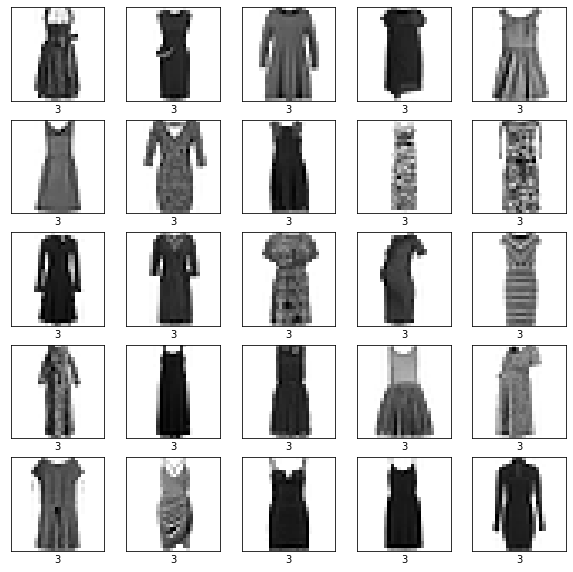

In [15]:
plt.figure(figsize=(10,10))
for i in range(3000,3025):
    plt.subplot(5,5,i+1-3000)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(datas[3][i], cmap=plt.cm.binary)
    plt.xlabel(labels[3][i])
plt.show()

In [16]:
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
    return model

In [17]:
for i in range(10):
    np.random.shuffle(labels[i])
    np.random.shuffle(datas[i])

In [18]:
# 비교군 모델 세팅
rnd = 31
num_class = 10
eval_list = []
num_data = [3000,800,800,800,800,800,800,800,800,800]# 10개 배열이고, 각 배열에 데이터 수 들어가있음
add_data = 100 # int

In [ ]:
for r in range(rnd):
    print(num_data)
    for c in range(num_class):
        # 만약 난수로 초기화되면 동일한 난수값으로 고정
        model = build_model()
        if r!=0:
            model.set_weights(global_weight)
        if c==0:
            weight_list = [[],[],[],[]]
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        model.fit(datas[c][:num_data[c]], labels[c][:num_data[c]], epochs=20,shuffle=True)
        for i in range(4):
            if c==0:
                weight_list[i] = model.get_weights()[i] / sum(num_data) * num_data[c]
            else:
                weight_list[i] += model.get_weights()[i] / sum(num_data) * num_data[c]
        
        num_data[c] += add_data
    global_weight = copy.deepcopy(weight_list)

    global_model = build_model()
    global_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    global_model.set_weights(global_weight)
    test_loss, test_acc = global_model.evaluate(test_images,  test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)
    
    eval_list.append(test_acc)

[3000, 800, 800, 800, 800, 800, 800, 800, 800, 800]


2022-06-02 14:28:32.076852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/include:/usr/local/cuda-11.6/lib64
2022-06-02 14:28:32.076885: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-02 14:28:32.089419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, reb

Epoch 1/20
94/94 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9893
Epoch 2/20
94/94 [==============================] - 0s 2ms/step - loss: 1.3987e-04 - accuracy: 1.0000
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 5.2182e-05 - accuracy: 1.0000
Epoch 4/20
94/94 [==============================] - 0s 2ms/step - loss: 2.7937e-05 - accuracy: 1.0000
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 1.7513e-05 - accuracy: 1.0000
Epoch 6/20
94/94 [==============================] - 0s 2ms/step - loss: 1.1869e-05 - accuracy: 1.0000
Epoch 7/20
94/94 [==============================] - 0s 2ms/step - loss: 8.7877e-06 - accuracy: 1.0000
Epoch 8/20
94/94 [==============================] - 0s 2ms/step - loss: 6.6229e-06 - accuracy: 1.0000
Epoch 9/20
94/94 [==============================] - 0s 2ms/step - loss: 5.1932e-06 - accuracy: 1.0000
Epoch 10/20
94/94 [==============================] - 0s 2ms/step - loss: 4.2027e-06 - 

25/25 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9613
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 3.8102e-04 - accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 1.7014e-04 - accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 1.0938e-04 - accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 8.2038e-05 - accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 5.5110e-05 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 4.1053e-05 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 3.3758e-05 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 2.5514e-05 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 2.1382e-05 - accuracy: 1

25/25 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9675
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 2.8137e-04 - accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 2.0788e-04 - accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 1.5868e-04 - accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 1.2861e-04 - accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 1.0318e-04 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 8.0287e-05 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 5.8078e-05 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 3.7749e-05 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 2.4782e-05 - accuracy: 1

29/29 [==============================] - 0s 2ms/step - loss: 7.2431e-06 - accuracy: 1.0000
Epoch 20/20
29/29 [==============================] - 0s 2ms/step - loss: 6.4805e-06 - accuracy: 1.0000
Epoch 1/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.8467
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 7.4242e-04 - accuracy: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 5.1213e-04 - accuracy: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 3.7885e-04 - accuracy: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 2ms/step - loss: 2.8398e-04 - accuracy: 1.0000
Epoch 

29/29 [==============================] - 0s 2ms/step - loss: 6.1788e-05 - accuracy: 1.0000
Epoch 20/20
29/29 [==============================] - 0s 2ms/step - loss: 5.5867e-05 - accuracy: 1.0000
Epoch 1/20
29/29 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.8222
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 4.4876e-04 - accuracy: 1.0000
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 2.0811e-04 - accuracy: 1.0000
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 1.2604e-04 - accuracy: 1.0000
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 8.1563e-05 - accuracy: 1.0000
Epoch 8/20
29/29 [==============================] - 0s 2ms/step - loss: 5.5739e-05 - accuracy: 1.0000
Ep

29/29 [==============================] - 0s 2ms/step - loss: 2.7416e-06 - accuracy: 1.0000
Epoch 20/20
29/29 [==============================] - 0s 2ms/step - loss: 2.4594e-06 - accuracy: 1.0000
313/313 - 1s - loss: 6.6026 - accuracy: 0.1000 - 568ms/epoch - 2ms/step

Test accuracy: 0.10000000149011612
[3200, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Epoch 1/20
100/100 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 7.7387e-05 - accuracy: 1.0000
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 3.9772e-05 - accuracy: 1.0000
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 2.3180e-05 - accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 1.5296e-05 - accuracy: 1.0000
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 1.0716e-05 - accuracy: 1.0000
Epoch 7/20
100/10

32/32 [==============================] - 0s 2ms/step - loss: 2.7228e-04 - accuracy: 1.0000
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 2.5366e-04 - accuracy: 1.0000
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 2.3857e-04 - accuracy: 1.0000
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 2.2430e-04 - accuracy: 1.0000
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.7616 - accuracy: 0.8670
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 8.7019e-04 - accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 7.5748e-04 - accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 6.7168e-04 - accuracy: 1.0000


32/32 [==============================] - 0s 2ms/step - loss: 3.6544e-04 - accuracy: 1.0000
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 3.3879e-04 - accuracy: 1.0000
Epoch 20/20
32/32 [==============================] - 0s 2ms/step - loss: 3.1584e-04 - accuracy: 1.0000
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.8460
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/20
32/32 

35/35 [==============================] - 0s 2ms/step - loss: 1.4032e-04 - accuracy: 1.0000
Epoch 17/20
35/35 [==============================] - 0s 2ms/step - loss: 1.3324e-04 - accuracy: 1.0000
Epoch 18/20
35/35 [==============================] - 0s 2ms/step - loss: 1.2670e-04 - accuracy: 1.0000
Epoch 19/20
35/35 [==============================] - 0s 2ms/step - loss: 1.2087e-04 - accuracy: 1.0000
Epoch 20/20
35/35 [==============================] - 0s 2ms/step - loss: 1.1549e-04 - accuracy: 1.0000
Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0634 - accuracy: 0.8382
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 9.2168e-04 - accuracy: 1.0000
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 7.9396e-04 - accuracy: 1.0000
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 6.8735e-04 - accuracy: 1.

35/35 [==============================] - 0s 2ms/step - loss: 4.4280e-04 - accuracy: 1.0000
Epoch 17/20
35/35 [==============================] - 0s 2ms/step - loss: 4.0406e-04 - accuracy: 1.0000
Epoch 18/20
35/35 [==============================] - 0s 2ms/step - loss: 3.6818e-04 - accuracy: 1.0000
Epoch 19/20
35/35 [==============================] - 0s 2ms/step - loss: 3.3856e-04 - accuracy: 1.0000
Epoch 20/20
35/35 [==============================] - 0s 2ms/step - loss: 3.0977e-04 - accuracy: 1.0000
Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.8355
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 6

35/35 [==============================] - 0s 2ms/step - loss: 1.1041e-04 - accuracy: 1.0000
Epoch 17/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0599e-04 - accuracy: 1.0000
Epoch 18/20
35/35 [==============================] - 0s 2ms/step - loss: 1.0078e-04 - accuracy: 1.0000
Epoch 19/20
35/35 [==============================] - 0s 2ms/step - loss: 9.6412e-05 - accuracy: 1.0000
Epoch 20/20
35/35 [==============================] - 0s 2ms/step - loss: 9.3310e-05 - accuracy: 1.0000
313/313 - 1s - loss: 9.5943 - accuracy: 0.1000 - 564ms/epoch - 2ms/step

Test accuracy: 0.10000000149011612
[3400, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]
Epoch 1/20
107/107 [==============================] - 1s 2ms/step - loss: 2.9440e-04 - accuracy: 1.0000
Epoch 2/20
107/107 [==============================] - 0s 2ms/step - loss: 9.1487e-06 - accuracy: 1.0000
Epoch 3/20
107/107 [==============================] - 0s 2ms/step - loss: 4.6695e-06 - accuracy: 1.0000
Epoch 4/20
107/1

38/38 [==============================] - 0s 2ms/step - loss: 4.0356e-04 - accuracy: 1.0000
Epoch 15/20
38/38 [==============================] - 0s 2ms/step - loss: 3.7856e-04 - accuracy: 1.0000
Epoch 16/20
38/38 [==============================] - 0s 2ms/step - loss: 3.5735e-04 - accuracy: 1.0000
Epoch 17/20
38/38 [==============================] - 0s 2ms/step - loss: 3.3552e-04 - accuracy: 1.0000
Epoch 18/20
38/38 [==============================] - 0s 2ms/step - loss: 3.1689e-04 - accuracy: 1.0000
Epoch 19/20
38/38 [==============================] - 0s 2ms/step - loss: 3.0014e-04 - accuracy: 1.0000
Epoch 20/20
38/38 [==============================] - 0s 2ms/step - loss: 2.8384e-04 - accuracy: 1.0000
Epoch 1/20
38/38 [==============================] - 0s 2ms/step - loss: 1.3138 - accuracy: 0.8292
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 6.7634e-04 - accuracy: 1.0000
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 5.6830e-04 - accura

38/38 [==============================] - 0s 2ms/step - loss: 5.2388e-04 - accuracy: 1.0000
Epoch 15/20
38/38 [==============================] - 0s 2ms/step - loss: 4.7979e-04 - accuracy: 1.0000
Epoch 16/20
38/38 [==============================] - 0s 2ms/step - loss: 4.4181e-04 - accuracy: 1.0000
Epoch 17/20
38/38 [==============================] - 0s 2ms/step - loss: 4.0844e-04 - accuracy: 1.0000
Epoch 18/20
38/38 [==============================] - 0s 2ms/step - loss: 3.7778e-04 - accuracy: 1.0000
Epoch 19/20
38/38 [==============================] - 0s 2ms/step - loss: 3.5271e-04 - accuracy: 1.0000
Epoch 20/20
38/38 [==============================] - 0s 2ms/step - loss: 3.2821e-04 - accuracy: 1.0000
Epoch 1/20
38/38 [==============================] - 0s 2ms/step - loss: 1.4697 - accuracy: 0.8150
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 8.8349e-04 - accuracy: 

41/41 [==============================] - 0s 2ms/step - loss: 1.1368e-05 - accuracy: 1.0000
Epoch 13/20
41/41 [==============================] - 0s 2ms/step - loss: 9.3738e-06 - accuracy: 1.0000
Epoch 14/20
41/41 [==============================] - 0s 2ms/step - loss: 8.0023e-06 - accuracy: 1.0000
Epoch 15/20
41/41 [==============================] - 0s 2ms/step - loss: 6.8541e-06 - accuracy: 1.0000
Epoch 16/20
41/41 [==============================] - 0s 2ms/step - loss: 5.9193e-06 - accuracy: 1.0000
Epoch 17/20
41/41 [==============================] - 0s 2ms/step - loss: 5.2060e-06 - accuracy: 1.0000
Epoch 18/20
41/41 [==============================] - 0s 2ms/step - loss: 4.5957e-06 - accuracy: 1.0000
Epoch 19/20
41/41 [==============================] - 0s 2ms/step - loss: 4.0859e-06 - accuracy: 1.0000
Epoch 20/20
41/41 [==============================] - 0s 2ms/step - loss: 3.6658e-06 - accuracy: 1.0000
Epoch 1/20
41/41 [==============================] - 0s 2ms/step - loss: 1.3720 - accu

41/41 [==============================] - 0s 2ms/step - loss: 6.9341e-04 - accuracy: 1.0000
Epoch 13/20
41/41 [==============================] - 0s 2ms/step - loss: 6.1536e-04 - accuracy: 1.0000
Epoch 14/20
41/41 [==============================] - 0s 2ms/step - loss: 5.4982e-04 - accuracy: 1.0000
Epoch 15/20
41/41 [==============================] - 0s 2ms/step - loss: 4.9403e-04 - accuracy: 1.0000
Epoch 16/20
41/41 [==============================] - 0s 2ms/step - loss: 4.4607e-04 - accuracy: 1.0000
Epoch 17/20
41/41 [==============================] - 0s 2ms/step - loss: 4.0456e-04 - accuracy: 1.0000
Epoch 18/20
41/41 [==============================] - 0s 2ms/step - loss: 3.7158e-04 - accuracy: 1.0000
Epoch 19/20
41/41 [==============================] - 0s 2ms/step - loss: 3.3872e-04 - accuracy: 1.0000
Epoch 20/20
41/41 [==============================] - 0s 2ms/step - loss: 3.1204e-04 - accuracy: 1.0000
Epoch 1/20
41/41 [==============================] - 0s 2ms/step - loss: 1.2782 - accu

41/41 [==============================] - 0s 2ms/step - loss: 2.2617e-04 - accuracy: 1.0000
Epoch 13/20
41/41 [==============================] - 0s 2ms/step - loss: 2.1391e-04 - accuracy: 1.0000
Epoch 14/20
41/41 [==============================] - 0s 2ms/step - loss: 2.0388e-04 - accuracy: 1.0000
Epoch 15/20
41/41 [==============================] - 0s 2ms/step - loss: 1.9285e-04 - accuracy: 1.0000
Epoch 16/20
41/41 [==============================] - 0s 2ms/step - loss: 1.8407e-04 - accuracy: 1.0000
Epoch 17/20
41/41 [==============================] - 0s 2ms/step - loss: 1.7543e-04 - accuracy: 1.0000
Epoch 18/20
41/41 [==============================] - 0s 2ms/step - loss: 1.6786e-04 - accuracy: 1.0000
Epoch 19/20
41/41 [==============================] - 0s 2ms/step - loss: 1.6032e-04 - accuracy: 1.0000
Epoch 20/20
41/41 [==============================] - 0s 2ms/step - loss: 1.5420e-04 - accuracy: 1.0000
313/313 - 1s - loss: 11.2186 - accuracy: 0.1000 - 549ms/epoch - 2ms/step

Test accura

44/44 [==============================] - 0s 2ms/step - loss: 9.6869e-05 - accuracy: 1.0000
Epoch 11/20
44/44 [==============================] - 0s 2ms/step - loss: 8.1222e-05 - accuracy: 1.0000
Epoch 12/20
44/44 [==============================] - 0s 2ms/step - loss: 6.9063e-05 - accuracy: 1.0000
Epoch 13/20
44/44 [==============================] - 0s 2ms/step - loss: 5.9836e-05 - accuracy: 1.0000
Epoch 14/20
44/44 [==============================] - 0s 2ms/step - loss: 5.2151e-05 - accuracy: 1.0000
Epoch 15/20
44/44 [==============================] - 0s 2ms/step - loss: 4.5819e-05 - accuracy: 1.0000
Epoch 16/20
44/44 [==============================] - 0s 2ms/step - loss: 4.0780e-05 - accuracy: 1.0000
Epoch 17/20
44/44 [==============================] - 0s 2ms/step - loss: 3.6365e-05 - accuracy: 1.0000
Epoch 18/20
44/44 [==============================] - 0s 2ms/step - loss: 3.2725e-05 - accuracy: 1.0000
Epoch 19/20
44/44 [==============================] - 0s 2ms/step - loss: 3.0114e-05 -

Epoch 11/20
44/44 [==============================] - 0s 2ms/step - loss: 8.0958e-04 - accuracy: 1.0000
Epoch 12/20
44/44 [==============================] - 0s 2ms/step - loss: 7.1839e-04 - accuracy: 1.0000
Epoch 13/20
44/44 [==============================] - 0s 2ms/step - loss: 6.4138e-04 - accuracy: 1.0000
Epoch 14/20
44/44 [==============================] - 0s 2ms/step - loss: 5.7514e-04 - accuracy: 1.0000
Epoch 15/20
44/44 [==============================] - 0s 2ms/step - loss: 5.2036e-04 - accuracy: 1.0000
Epoch 16/20
44/44 [==============================] - 0s 2ms/step - loss: 4.7197e-04 - accuracy: 1.0000
Epoch 17/20
44/44 [==============================] - 0s 2ms/step - loss: 4.3038e-04 - accuracy: 1.0000
Epoch 18/20
44/44 [==============================] - 0s 2ms/step - loss: 3.9373e-04 - accuracy: 1.0000
Epoch 19/20
44/44 [==============================] - 0s 2ms/step - loss: 3.6189e-04 - accuracy: 1.0000
Epoch 20/20
44/44 [==============================] - 0s 2ms/step - loss: 

47/47 [==============================] - 0s 2ms/step - loss: 7.0998e-04 - accuracy: 1.0000
Epoch 10/20
47/47 [==============================] - 0s 2ms/step - loss: 6.3277e-04 - accuracy: 1.0000
Epoch 11/20
47/47 [==============================] - 0s 2ms/step - loss: 5.6715e-04 - accuracy: 1.0000
Epoch 12/20
47/47 [==============================] - 0s 2ms/step - loss: 5.1205e-04 - accuracy: 1.0000
Epoch 13/20
47/47 [==============================] - 0s 2ms/step - loss: 4.6285e-04 - accuracy: 1.0000
Epoch 14/20
47/47 [==============================] - 0s 2ms/step - loss: 4.2122e-04 - accuracy: 1.0000
Epoch 15/20
47/47 [==============================] - 0s 2ms/step - loss: 3.8513e-04 - accuracy: 1.0000
Epoch 16/20
47/47 [==============================] - 0s 2ms/step - loss: 3.5248e-04 - accuracy: 1.0000
Epoch 17/20
47/47 [==============================] - 0s 2ms/step - loss: 3.2445e-04 - accuracy: 1.0000
Epoch 18/20
47/47 [==============================] - 0s 2ms/step - loss: 2.9939e-04 -

47/47 [==============================] - 0s 2ms/step - loss: 7.5839e-04 - accuracy: 1.0000
Epoch 11/20
47/47 [==============================] - 0s 2ms/step - loss: 6.3063e-04 - accuracy: 1.0000
Epoch 12/20
47/47 [==============================] - 0s 2ms/step - loss: 5.3066e-04 - accuracy: 1.0000
Epoch 13/20
47/47 [==============================] - 0s 2ms/step - loss: 4.5641e-04 - accuracy: 1.0000
Epoch 14/20
47/47 [==============================] - 0s 2ms/step - loss: 3.8976e-04 - accuracy: 1.0000
Epoch 15/20
47/47 [==============================] - 0s 2ms/step - loss: 3.3926e-04 - accuracy: 1.0000
Epoch 16/20
47/47 [==============================] - 0s 2ms/step - loss: 2.9620e-04 - accuracy: 1.0000
Epoch 17/20
47/47 [==============================] - 0s 2ms/step - loss: 2.6055e-04 - accuracy: 1.0000
Epoch 18/20
47/47 [==============================] - 0s 2ms/step - loss: 2.3086e-04 - accuracy: 1.0000
Epoch 19/20
47/47 [==============================] - 0s 2ms/step - loss: 2.0581e-04 -

In [ ]:
# 제안하는 모델 세팅
rnd = 31
num_class = 10
eval_list = []
num_data = [3000,800,800,800,800,800,800,800,800,800]# 10개 배열이고, 각 배열에 데이터 수 들어가있음
add_data = [34,107,107,107,107,107,107,107,107,107] # 최종적으로 4020이 되도록

In [ ]:
for r in range(rnd):
    print(num_data)
    for c in range(num_class):
        # 만약 난수로 초기화되면 동일한 난수값으로 고정
        model = build_model()
        if r!=0:
            model.set_weights(global_weight)
        if c==0:
            weight_list = [[],[],[],[]]
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        model.fit(datas[c][:num_data[c]], labels[c][:num_data[c]], epochs=20,shuffle=True)
        for i in range(4):
            if c==0:
                weight_list[i] = model.get_weights()[i] / sum(num_data) * num_data[c]
            else:
                weight_list[i] += model.get_weights()[i] / sum(num_data) * num_data[c]
        
        num_data[c] += add_data[c]
        if r==rnd-2 and c!=0:
            num_data[c]+=10
    global_weight = copy.deepcopy(weight_list)

    
    global_model = build_model()
    global_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    global_model.set_weights(global_weight)
    test_loss, test_acc = global_model.evaluate(test_images,  test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)
    
    eval_list.append(test_acc)
# output : rnd 수만큼의 eval 결과